<a href="https://colab.research.google.com/github/viswanathareddy04/MachineLearning/blob/main/disease_prediction_project_27_02_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix,plot_roc_curve,precision_score,roc_curve
import seaborn as sns
from sklearn.utils import shuffle
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [229]:
df1 = pd.read_excel('disease_and_symptoms2.xlsx', header=None)

# row_counts = df1.count(axis=1)

# print(max(row_counts))

df1.columns = ['code', 'Disease', 'Symptom_1', 'Severity_1', 'Symptom_2', 'Severity_2',
              'Symptom_3', 'Severity_3', 'Symptom_4', 'Severity_4', 'Symptom_5', 'Severity_5',
              'Symptom_6', 'Severity_6', 'Symptom_7', 'Severity_7', 'Symptom_8', 'Severity_8',
              'Symptom_9', 'Severity_9', 'Symptom_10', 'Severity_10', 'Symptom_11', 'Severity_11', 'Symptom_12', 'Severity_12',
             ]

df1.head()

,code,Disease,Symptom_1,Severity_1,Symptom_2,Severity_2,Symptom_3,Severity_3,Symptom_4,Severity_4,...,Symptom_8,Severity_8,Symptom_9,Severity_9,Symptom_10,Severity_10,Symptom_11,Severity_11,Symptom_12,Severity_12
0,202,Hyperkalemia,"[{symptoms"":""Shortness of breath""}""","{symptoms"":""52""}""","{symptoms"":""Weakness""}""","{symptoms"":""49""}""","{symptoms"":""Nausea""}""","{symptoms"":""45""}""","{symptoms"":""Vomiting""}""","{symptoms"":""40""}""",...,"{symptoms"":""Sharp abdominal pain""}""","{symptoms"":""24""}""","{symptoms"":""Feeling ill""}""","{symptoms"":""15""}""","{symptoms"":""Decreased heart rate""}""","{symptoms"":""12""}""","{symptoms"":""Decreased appetite""}""","{symptoms"":""12""}""","{symptoms"":""Difficulty in swallowing""}""","{symptoms"":""8""}]"""
1,203,Cornea infection,"[{symptoms"":""Pain in eye""}""","{symptoms"":""80""}""","{symptoms"":""Eye redness""}""","{symptoms"":""66""}""","{symptoms"":""Diminished vision""}""","{symptoms"":""55""}""","{symptoms"":""Symptoms of eye""}""","{symptoms"":""44""}""",...,"{symptoms"":""Itchiness of eye""}""","{symptoms"":""21""}""","{symptoms"":""Spots or clouds in vision""}""","{symptoms"":""13""}""","{symptoms"":""Swollen eye""}""","{symptoms"":""10""}""","{symptoms"":""Lip swelling""}""","{symptoms"":""7""}""","{symptoms"":""Itchy eyelid""}""","{symptoms"":""7""}]"""
2,204,Abscess of the lung,"[{symptoms"":""Cough""}""","{symptoms"":""81""}""","{symptoms"":""Sharp chest pain""}""","{symptoms"":""72""}""","{symptoms"":""Shortness of breath""}""","{symptoms"":""72""}""","{symptoms"":""Hemoptysis""}""","{symptoms"":""54""}""",...,"{symptoms"":""Vomiting""}""","{symptoms"":""54""}""","{symptoms"":""Headache""}""","{symptoms"":""54""}""","{symptoms"":""Itchy eyelid""}""","{symptoms"":""5""}""","{symptoms"":""Wrist weakness""}""","{symptoms"":""5""}""","{symptoms"":""Excessive growth""}""","{symptoms"":""5""}]"""
3,205,Dengue fever,"[{symptoms"":""Sore throat""}""","{symptoms"":""100""}""","{symptoms"":""Fever""}""","{symptoms"":""100""}""","{symptoms"":""Shoulder cramps or spasms""}""","{symptoms"":""32""}""","{symptoms"":""Ankle pain""}""","{symptoms"":""32""}""",...,"{symptoms"":""Excessive anger""}""","{symptoms"":""32""}""","{symptoms"":""Pain or soreness of breast""}""","{symptoms"":""32""}""","{symptoms"":""Knee lump or mass""}""","{symptoms"":""32""}""","{symptoms"":""Facial pain""}""","{symptoms"":""32""}""","{symptoms"":""Pain in eye""}""","{symptoms"":""32""}]"""
4,206,Chronic sinusitis,"[{symptoms"":""Cough""}""","{symptoms"":""75""}""","{symptoms"":""Nasal congestion""}""","{symptoms"":""75""}""","{symptoms"":""Headache""}""","{symptoms"":""62""}""","{symptoms"":""Sore throat""}""","{symptoms"":""59""}""",...,"{symptoms"":""Ear pain""}""","{symptoms"":""39""}""","{symptoms"":""Painful sinuses""}""","{symptoms"":""34""}""","{symptoms"":""Sinus congestion""}""","{symptoms"":""27""}""","{symptoms"":""Facial pain""}""","{symptoms"":""23""}""","{symptoms"":""Congestion in chest""}""","{symptoms"":""14""}]"""


In [230]:

df1.dropna(axis=1,how='all',inplace=True)
df1.head()

,code,Disease,Symptom_1,Severity_1,Symptom_2,Severity_2,Symptom_3,Severity_3,Symptom_4,Severity_4,...,Symptom_8,Severity_8,Symptom_9,Severity_9,Symptom_10,Severity_10,Symptom_11,Severity_11,Symptom_12,Severity_12
0,202,Hyperkalemia,"[{symptoms"":""Shortness of breath""}""","{symptoms"":""52""}""","{symptoms"":""Weakness""}""","{symptoms"":""49""}""","{symptoms"":""Nausea""}""","{symptoms"":""45""}""","{symptoms"":""Vomiting""}""","{symptoms"":""40""}""",...,"{symptoms"":""Sharp abdominal pain""}""","{symptoms"":""24""}""","{symptoms"":""Feeling ill""}""","{symptoms"":""15""}""","{symptoms"":""Decreased heart rate""}""","{symptoms"":""12""}""","{symptoms"":""Decreased appetite""}""","{symptoms"":""12""}""","{symptoms"":""Difficulty in swallowing""}""","{symptoms"":""8""}]"""
1,203,Cornea infection,"[{symptoms"":""Pain in eye""}""","{symptoms"":""80""}""","{symptoms"":""Eye redness""}""","{symptoms"":""66""}""","{symptoms"":""Diminished vision""}""","{symptoms"":""55""}""","{symptoms"":""Symptoms of eye""}""","{symptoms"":""44""}""",...,"{symptoms"":""Itchiness of eye""}""","{symptoms"":""21""}""","{symptoms"":""Spots or clouds in vision""}""","{symptoms"":""13""}""","{symptoms"":""Swollen eye""}""","{symptoms"":""10""}""","{symptoms"":""Lip swelling""}""","{symptoms"":""7""}""","{symptoms"":""Itchy eyelid""}""","{symptoms"":""7""}]"""
2,204,Abscess of the lung,"[{symptoms"":""Cough""}""","{symptoms"":""81""}""","{symptoms"":""Sharp chest pain""}""","{symptoms"":""72""}""","{symptoms"":""Shortness of breath""}""","{symptoms"":""72""}""","{symptoms"":""Hemoptysis""}""","{symptoms"":""54""}""",...,"{symptoms"":""Vomiting""}""","{symptoms"":""54""}""","{symptoms"":""Headache""}""","{symptoms"":""54""}""","{symptoms"":""Itchy eyelid""}""","{symptoms"":""5""}""","{symptoms"":""Wrist weakness""}""","{symptoms"":""5""}""","{symptoms"":""Excessive growth""}""","{symptoms"":""5""}]"""
3,205,Dengue fever,"[{symptoms"":""Sore throat""}""","{symptoms"":""100""}""","{symptoms"":""Fever""}""","{symptoms"":""100""}""","{symptoms"":""Shoulder cramps or spasms""}""","{symptoms"":""32""}""","{symptoms"":""Ankle pain""}""","{symptoms"":""32""}""",...,"{symptoms"":""Excessive anger""}""","{symptoms"":""32""}""","{symptoms"":""Pain or soreness of breast""}""","{symptoms"":""32""}""","{symptoms"":""Knee lump or mass""}""","{symptoms"":""32""}""","{symptoms"":""Facial pain""}""","{symptoms"":""32""}""","{symptoms"":""Pain in eye""}""","{symptoms"":""32""}]"""
4,206,Chronic sinusitis,"[{symptoms"":""Cough""}""","{symptoms"":""75""}""","{symptoms"":""Nasal congestion""}""","{symptoms"":""75""}""","{symptoms"":""Headache""}""","{symptoms"":""62""}""","{symptoms"":""Sore throat""}""","{symptoms"":""59""}""",...,"{symptoms"":""Ear pain""}""","{symptoms"":""39""}""","{symptoms"":""Painful sinuses""}""","{symptoms"":""34""}""","{symptoms"":""Sinus congestion""}""","{symptoms"":""27""}""","{symptoms"":""Facial pain""}""","{symptoms"":""23""}""","{symptoms"":""Congestion in chest""}""","{symptoms"":""14""}]"""


In [231]:

df1 = df1.fillna('')

for col in df1.columns[2:]:
    df1[col] = df1[col].str.replace('[{}]','').str.replace('"','').str.replace('[','').str.replace(']','').str.replace('symptoms:','')
 
df1.head()

<ipython-input-231-d8df7524950f>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df1[col] = df1[col].str.replace('[{}]','').str.replace('"','').str.replace('[','').str.replace(']','').str.replace('symptoms:','')
<ipython-input-231-d8df7524950f>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1[col] = df1[col].str.replace('[{}]','').str.replace('"','').str.replace('[','').str.replace(']','').str.replace('symptoms:','')


,code,Disease,Symptom_1,Severity_1,Symptom_2,Severity_2,Symptom_3,Severity_3,Symptom_4,Severity_4,...,Symptom_8,Severity_8,Symptom_9,Severity_9,Symptom_10,Severity_10,Symptom_11,Severity_11,Symptom_12,Severity_12
0,202,Hyperkalemia,Shortness of breath,52,Weakness,49,Nausea,45,Vomiting,40,...,Sharp abdominal pain,24,Feeling ill,15,Decreased heart rate,12,Decreased appetite,12,Difficulty in swallowing,8
1,203,Cornea infection,Pain in eye,80,Eye redness,66,Diminished vision,55,Symptoms of eye,44,...,Itchiness of eye,21,Spots or clouds in vision,13,Swollen eye,10,Lip swelling,7,Itchy eyelid,7
2,204,Abscess of the lung,Cough,81,Sharp chest pain,72,Shortness of breath,72,Hemoptysis,54,...,Vomiting,54,Headache,54,Itchy eyelid,5,Wrist weakness,5,Excessive growth,5
3,205,Dengue fever,Sore throat,100,Fever,100,Shoulder cramps or spasms,32,Ankle pain,32,...,Excessive anger,32,Pain or soreness of breast,32,Knee lump or mass,32,Facial pain,32,Pain in eye,32
4,206,Chronic sinusitis,Cough,75,Nasal congestion,75,Headache,62,Sore throat,59,...,Ear pain,39,Painful sinuses,34,Sinus congestion,27,Facial pain,23,Congestion in chest,14


In [232]:
def create_symptom_dict(row):
    symptom_dict = {}
    for i in range(1, 13):
        symptom_col = f"Symptom_{i}"
        severity_col = f"Severity_{i}"
        if pd.isna(row[symptom_col]) or pd.isna(row[severity_col]):
            break
        weightage = pd.to_numeric(row[severity_col])
        if weightage >= 30:
          symptom_dict[row[symptom_col]] = weightage
    return symptom_dict
symptom_dict = {}
for index, row in df1.iterrows():
    symptom_dict[row['Disease']] = create_symptom_dict(row)

symptom_dict

{'Hyperkalemia': {'Shortness of breath': 52,
  'Weakness': 49,
  'Nausea': 45,
  'Vomiting': 40,
  'Dizziness': 36,
  'Sharp chest pain': 32},
 'Cornea infection': {'Pain in eye': 80,
  'Eye redness': 66,
  'Diminished vision': 55,
  'Symptoms of eye': 44,
  'Foreign body sensation in eye': 39,
  'Lacrimation': 32},
 'Abscess of the lung': {'Cough': 81,
  'Sharp chest pain': 72,
  'Shortness of breath': 72,
  'Hemoptysis': 54,
  'Depressive or psychotic symptoms': 54,
  'Back pain': 54,
  'Drainage in throat': 54,
  'Vomiting': 54,
  'Headache': 54},
 'Dengue fever': {'Sore throat': 100,
  'Fever': 100,
  'Shoulder cramps or spasms': 32,
  'Ankle pain': 32,
  'Wrist pain': 32,
  'Pain during pregnancy': 32,
  'Joint stiffness or tightness': 32,
  'Excessive anger': 32,
  'Pain or soreness of breast': 32,
  'Knee lump or mass': 32,
  'Facial pain': 32,
  'Pain in eye': 32},
 'Chronic sinusitis': {'Cough': 75,
  'Nasal congestion': 75,
  'Headache': 62,
  'Sore throat': 59,
  'Fever': 48

In [233]:

df2 = pd.DataFrame.from_dict(symptom_dict, orient='index').fillna(0)
df2 = df2.reset_index().rename(columns={'index': 'Disease'})
df2.head()

,Disease,Shortness of breath,Weakness,Nausea,Vomiting,Dizziness,Sharp chest pain,Pain in eye,Eye redness,Diminished vision,...,Cross-eyed,Infant spitting up,Bowlegged or knock-kneed,Muscle pain,Temper problems,Symptoms of infants,Sinus congestion,Infant feeding problem,Too little hair,Knee stiffness or tightness
0,Hyperkalemia,52.0,49.0,45.0,40.0,36.0,32.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Abscess of the lung,72.0,0.0,0.0,54.0,0.0,72.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Atrial fibrillation,46.0,0.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Pulmonary congestion,85.0,0.0,0.0,0.0,0.0,65.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Empyema,63.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [234]:
df2.iloc[:, 1:] = df2.iloc[:, 1:].applymap(lambda x: float(x)).div(df2.iloc[:, 1:].sum(axis=1), axis=0)

In [235]:
df2.head()

,Disease,Shortness of breath,Weakness,Nausea,Vomiting,Dizziness,Sharp chest pain,Pain in eye,Eye redness,Diminished vision,...,Cross-eyed,Infant spitting up,Bowlegged or knock-kneed,Muscle pain,Temper problems,Symptoms of infants,Sinus congestion,Infant feeding problem,Too little hair,Knee stiffness or tightness
0,Hyperkalemia,0.204724,0.192913,0.177165,0.157480,0.141732,0.125984,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Abscess of the lung,0.131148,0.000000,0.000000,0.098361,0.000000,0.131148,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Atrial fibrillation,0.400000,0.000000,0.000000,0.000000,0.000000,0.330435,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Pulmonary congestion,0.256024,0.000000,0.000000,0.000000,0.000000,0.195783,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Empyema,0.204545,0.000000,0.000000,0.000000,0.000000,0.142857,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [236]:
from imblearn.over_sampling import SMOTE
X = df2.drop('Disease', axis=1)
y = df2['Disease']

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)
X.shape , y.shape , X_resampled.shape , y_resampled.shape

((742, 275), (742,), (742, 275), (742,))

In [237]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler()

X_resampled, y_resampled = oversampler.fit_resample(X, y)
X.shape , y.shape , X_resampled.shape , y_resampled.shape

((742, 275), (742,), (742, 275), (742,))

In [239]:
df2.describe()

,Shortness of breath,Weakness,Nausea,Vomiting,Dizziness,Sharp chest pain,Pain in eye,Eye redness,Diminished vision,Symptoms of eye,...,Cross-eyed,Infant spitting up,Bowlegged or knock-kneed,Muscle pain,Temper problems,Symptoms of infants,Sinus congestion,Infant feeding problem,Too little hair,Knee stiffness or tightness
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,0.028408,0.013323,0.016580,0.022125,0.015445,0.022517,0.012494,0.006412,0.023317,0.005898,...,0.000312,0.000211,0.000237,0.000158,0.000283,0.000095,0.000094,0.000136,0.001348,0.000109
std,0.100663,0.068509,0.052536,0.059087,0.053264,0.071548,0.062624,0.036731,0.109664,0.033611,...,0.008509,0.005736,0.006469,0.004298,0.005853,0.002593,0.002548,0.003694,0.036711,0.002977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.402439,0.400000,0.400000,0.572917,1.000000,0.316092,1.000000,0.422535,...,0.231788,0.156250,0.176211,0.117073,0.146465,0.070632,0.069418,0.100610,1.000000,0.081081


In [253]:
data = df2.iloc[:,1:].values
labels = df2['Disease'].values

In [254]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size = 0.8,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(593, 275) (149, 275) (593,) (149,)



**Initialize and train a Support vector classifier**

In [255]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [256]:
y_pred = svc.predict(X_test)

In [258]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')

<AxesSubplot:title={'center':'Before removing Null values'}>

In [260]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define the true labels
y_true = df2['Disease']

# Predict the labels using the trained model
y_pred = svc.predict(df2.drop(columns=['Disease']))

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate precision, recall, and f1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

# Generate the classification report
report = classification_report(y_true, y_pred)
print('Classification report:\n', report)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Accuracy: 0.7601078167115903
Precision: 0.6641498737859923
Recall: 0.7601078167115903
F1-score: 0.6936657681940701
Classification report:
                                                           precision    recall  f1-score   support

                               Abdominal aortic aneurysm       1.00      1.00      1.00         1
                                        Abdominal hernia       1.00      1.00      1.00         1
                                         Abscess of nose       1.00      1.00      1.00         1
                                     Abscess of the lung       0.50      1.00      0.67         1
                                  Abscess of the pharynx       1.00      1.00      1.00         1
                                    Acanthosis nigricans       1.00      1.00      1.00         1
                                               Acariasis       1.00      1.00      1.00         1
                                               Achalasia       0.00      0.0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: 

In [ ]:
def predd(S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,x):
    psymptoms = [S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17]
    print(psymptoms)
    a = np.array(df1["Symptom"])
    b = np.array(df1["weight"])
    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j]==a[k]:
                psymptoms[j]=b[k]

    psy = [psymptoms]

    pred2 = x.predict(psy)
    print("The prediction is",pred2[0])

In [ ]:
sympList=df1["Symptom"].to_list()
predd(sympList[7],sympList[5],sympList[2],sympList[80],0,0,0,0,0,0,0,0,0,0,0,0,0,rnd_forest)

['stomach pain', 'chills', 'nodal skin eruptions', 'muscle weakness', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The prediction is Paralysis (brain hemorrhage)


In [ ]:
sympList=df1["Symptom"].to_list()
predd(sympList[8],sympList[1],sympList[2],sympList[80],0,0,0,0,0,0,0,0,0,0,0,0,0,SVM_hyperd)

['acidity', 'skin rash', 'nodal skin eruptions', 'muscle weakness', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The prediction is Paralysis (brain hemorrhage)


In [ ]:
sympList=df1["Symptom"].to_list()
predd(sympList[8],sympList[5],sympList[2],sympList[80],0,0,0,0,0,0,0,0,0,0,0,0,0,SVM_unhyperd)

['acidity', 'chills', 'nodal skin eruptions', 'muscle weakness', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The prediction is Allergy


# Comparison between algorithms testing and training

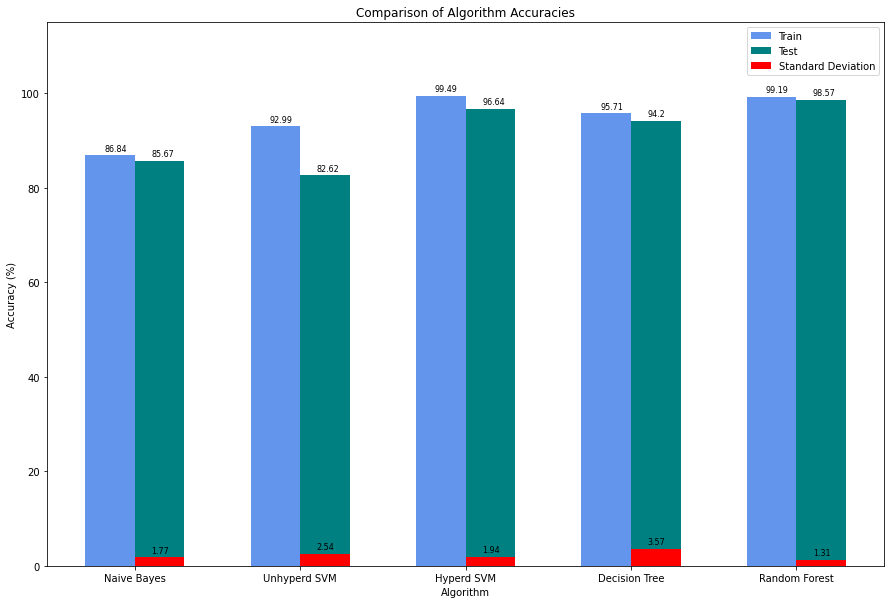

In [ ]:
n_groups = 5
algorithms = ('Naive Bayes','Unhyperd SVM', 'Hyperd SVM','Decision Tree', 'Random Forest')
train_accuracy = (gaussian_train.mean()*100.0, 
                 SVM_unhyperd_train.mean()*100.0,
                 SVM_hyperd_train.mean()*100.0,
                 DS_train.mean()*100.0,
                 rnd_forest_train.mean()*100.0,
                 )


test_accuracy = (gaussian_test.mean()*100.0, 
                 SVM_unhyperd_test.mean()*100.0,
                 SVM_hyperd_test.mean()*100.0,
                 DS_test.mean()*100.0,
                 rnd_forest_test.mean()*100.0
                )

Standard_Deviation=(gaussian_test.std()*100.0, 
                 SVM_unhyperd_test.std()*100.0,
                 SVM_hyperd_test.std()*100.0,
                 DS_test.std()*100.0,     
                 rnd_forest_test.std()*100.0
                 
                   )

# create plot
fig, ax = plt.subplots(figsize=(15, 10))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 1
rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='Cornflowerblue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color='Teal', label='Test')
rects3 = plt.bar(index + bar_width, Standard_Deviation, bar_width, alpha = opacity, color='red', label='Standard Deviation')
plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies') # plot title
plt.xticks(index + bar_width * 0.5, algorithms) # x axis data labels
plt.legend(loc = 'upper right') # show legend
for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(Standard_Deviation):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))    